In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

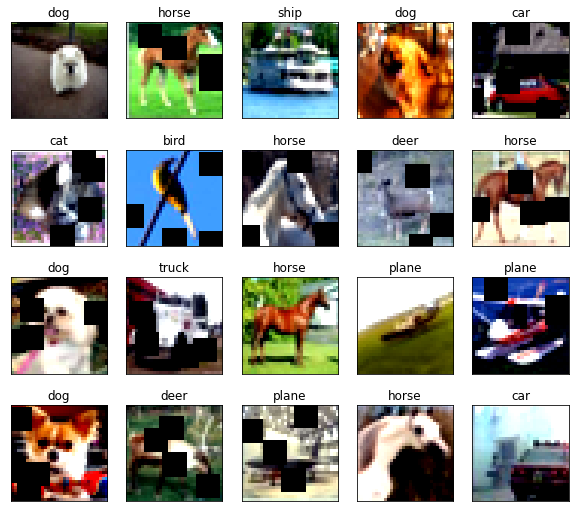

In [6]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [ ]:
import drishtypy.models.resnet as mod
model = mod.ResNet18()

In [ ]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

In [ ]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

In [10]:
# build and train the model
model_name = "Model CIFAR10"
EPOCHS = 50
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.001)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.658976, Accuracy: 3731/10000 (37.31%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.493319, Accuracy: 4571/10000 (45.71%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.312973, Accuracy: 5471/10000 (54.71%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.283520, Accuracy: 5665/10000 (56.65%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.728546, Accuracy: 7437/10000 (74.37%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.713628, Accuracy: 7539/10000 (75.39%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.649128, Accuracy: 7741/10000 (77.41%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.535089, Accuracy: 8143/10000 (81.43%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.527584, Accuracy: 8185/10000 (81.85%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.521431, Accuracy: 8215/10000 (82.15%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.507643, Accuracy: 8276/10000 (82.76%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.503128, Accuracy: 8269/10000 (82.69%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.503993, Accuracy: 8286/10000 (82.86%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.494777, Accuracy: 8285/10000 (82.85%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.494681, Accuracy: 8287/10000 (82.87%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.503576, Accuracy: 8272/10000 (82.72%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.497792, Accuracy: 8279/10000 (82.79%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.498260, Accuracy: 8277/10000 (82.77%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.495326, Accuracy: 8268/10000 (82.68%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.498663, Accuracy: 8276/10000 (82.76%)

EPOCH: 20


Loss=0.527701 Batch_id=61 Accuracy=81.33:  16%|█▌        | 62/391 [00:08<00:44,  7.39it/s]


KeyboardInterrupt: 